In [1]:
import nltk
from nltk.tokenize import word_tokenize
from cltk.corpus.utils.importer import CorpusImporter
corpus_importer = CorpusImporter('latin')
corpus_importer.import_corpus('latin_models_cltk')
from cltk.lemmatize.latin.backoff import BackoffLatinLemmatizer
import os

In [2]:
prose = (os.listdir(r"C:\Users\User\Desktop\нис\prose"))
poetry = (os.listdir(r"C:\Users\User\Desktop\нис\poetry"))

In [3]:
a = 0
c = 0
total = 0
total_pr = 0
total_poet = 0

In [4]:
for i in range(len(prose)):
    with open(prose[i], 'r', encoding='utf-8') as f:
        text = f.read()
    words = [w.lower() for w in word_tokenize(text) if w.isalpha()]
    lemmatizer = BackoffLatinLemmatizer()
    spisok = lemmatizer.lemmatize(words)
    for i in range(len(spisok)):
        if 'albus' in spisok[i]:
            a = a + 1
        elif 'candidus' in spisok[i]:
            c = c + 1
    total= total + len(words)
    total_pr= total_pr +len(words)

In [5]:
c2 = 0
a2 = 0

In [6]:
for i in range(len(poetry)):
    with open(poetry[i], 'r', encoding='utf-8') as f:
        text = f.read()
    words = [w.lower() for w in word_tokenize(text) if w.isalpha()]
    lemmatizer = BackoffLatinLemmatizer()
    spisok2 = lemmatizer.lemmatize(words)
    for i in range(len(spisok2)):
        if 'albus' in spisok2[i]:
            a2 = a2 + 1
        elif 'candidus' in spisok2[i]:
            c2 = c2 + 1
    total= total + len(words)
    total_poet= total_poet +len(words)

In [21]:
import pandas as pd

In [34]:
prose_dict = {'words': ['total', 'albus', 'candidus'], 'number': [total_pr, a, c], 'ipm': ['', (a/total_pr)*1000000, (c/total_pr)*1000000]}
prose_df = pd.DataFrame(prose_dict)

prose_df

,words,number,ipm
0,total,1638250,
1,albus,43,26.2475
2,candidus,31,18.9226


In [33]:
poetry_dict = {'words': ['total', 'albus', 'candidus'], 'number': [total_poet, a2, c2], 'ipm': ['', (a2/total_poet)*1000000, (c2/total_poet)*1000000]}
poetry_df = pd.DataFrame(poetry_dict)

poetry_df

,words,number,ipm
0,total,582331,
1,albus,99,170.006
2,candidus,102,175.158


In [25]:
import matplotlib.pyplot as plt

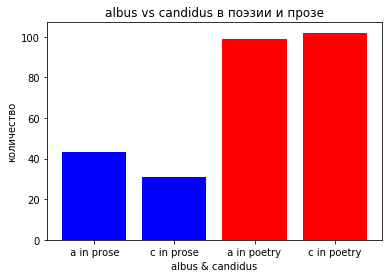

In [30]:
X = [1, 2]
X2 = [3, 4]
Y = [a, c]
Y2 = [a2, c2]
word = [' a in prose ', ' c in prose ', ' a in poetry ', ' c in poetry ']
plt.bar(X, Y, color='blue')
plt.bar(X2, Y2, color='red')
plt.xticks(ticks=X+X2, labels=word)
plt.title('albus vs candidus в поэзии и прозе')
plt.ylabel('количество')
plt.xlabel('albus & candidus')
plt.show()

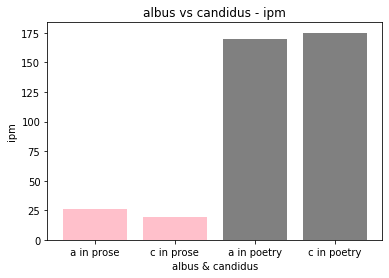

In [35]:
X = [1, 2]
X2 = [3, 4]
Y = [(a/total_pr)*1000000, (c/total_pr)*1000000]
Y2 = [(a2/total_poet)*1000000, (c2/total_poet)*1000000]
word = [' a in prose ', ' c in prose ', ' a in poetry ', ' c in poetry ']
plt.bar(X, Y, color='pink')
plt.bar(X2, Y2, color='grey')
plt.xticks(ticks=X+X2, labels=word)
plt.title('albus vs candidus - ipm')
plt.ylabel('ipm')
plt.xlabel('albus & candidus')
plt.show()